# 神经网络搭建实战以及Sequential的使用

## CIFAR10的网络结构

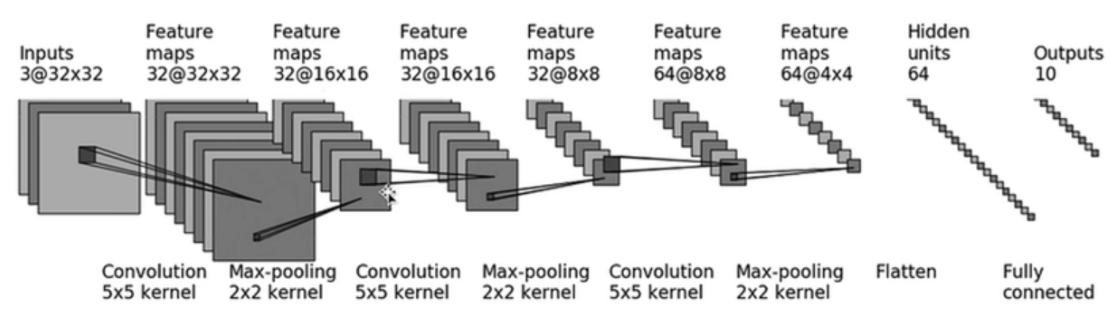

In [20]:
# 神经网络模型搭建实战
import torch
from torch import nn
from torch.nn import Conv2d, MaxPool2d, Flatten, Linear, Sequential
from torch.utils.tensorboard import  SummaryWriter


In [19]:
#使用传统方法搭建神经网络模型
class Neural(nn.Module):
    def __init__(self):
        super(Neural, self).__init__()
        self.conv1 = Conv2d(3, 32, 5, padding= 2)
        self.maxpool1 = MaxPool2d(2)
        #若padding参数设置为same，自动计算
        self.conv2 = Conv2d(32, 32, 5, padding= 2)
        self.maxpool2 = MaxPool2d(2)
        self.conv3 = Conv2d(32, 64, 5, padding= 2)
        self.maxpool3 = MaxPool2d(2)
        self.flatten = Flatten()
        #计算方式为64*4*4个数据样本
        self.linear1 = Linear(64*4*4, 64)
        self.linear2 = Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = self.maxpool3(x)
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.linear2(x)
        return x

neural = Neural()
print(neural)
input = torch.ones((64, 3, 32, 32))
output = neural(input)
print(output.shape)

        


Neural(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=1024, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=10, bias=True)
)
torch.Size([64, 10])


In [18]:
# 引入Sequential方法搭建神经网络模型
class Neural_Sequential(nn.Module):
    def __init__(self):
        super(Neural_Sequential, self).__init__()
        self.model1 = Sequential(
            Conv2d(3, 32, 5, padding= 2),
            MaxPool2d(2),
            Conv2d(32, 32, 5, padding= 2),
            MaxPool2d(2),
            Conv2d(32, 64, 5, padding= 2),
            MaxPool2d(2),
            Flatten(),
            Linear(1024, 64),
            Linear(64, 10)
        )
    
    def forward(self, x):
        x = self.model1(x)
        return x
input = torch.ones((64, 3, 32, 32))
neural_sequential = Neural_Sequential()
# print(neural_sequential)
output = neural_sequential(input)
print(output.shape)

torch.Size([64, 10])


In [21]:
#可视化模型训练过程
writer = SummaryWriter("logs_seq")
writer.add_graph(neural_sequential, input)
writer.close()